# Tensorflow와 Keras

Tensorflow - 구글에서 만든 Framework

# Keras

고성능 딥러닝 라이브러리

구글에서 만든 프레임워크인 Tensorflow 안에서 Keras가 동작

# Tensorflow가 있는데 Keras를 따로 쓰는 이유

Tensorflow는 입문자에게는 고난이도

반면, Keras는 사용자(개발자) 친화적으로 만들어져 있어서 상대적으로 사용이 간편

단순한 신경망 구성 등 기존에 있는 것만으로 개발 가능하다면 Keras로 충분

디테일한 조종 등에는 한계가 있어서 Tensorflow로 함께 사용하면 조금 더 좋은 개발 가능

In [ ]:
import tensorflow as tf

In [ ]:
# mnist 데이터 확보
mnist = tf.keras.datasets.mnist # v2 방식

# v1 (이전방법)
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('./mnist/data', one_hot=True)



In [ ]:
# 케라스 이용해서 train_data, test_data 나누기
train_data, test_data = tf.keras.datasets.mnist.load_data()
# tr.keras.datasets.mnist.load_data()
#     학습용 데이터, 테스트용 데이터를 각각 (feature, label) 형태로 반환

(img_train, label_train) = train_data
(img_test, label_test) = test_data

# 데이터 확인
print(train_data) # 학습용 데이터
print()
print(test_data) # 테스트용 데이터

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [ ]:
# 학습용
print(img_train.shape)
print(label_train.shape)
# 테스트용
print(img_test.shape)
print(label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
img = img_train[150]
img.shape

(28, 28)

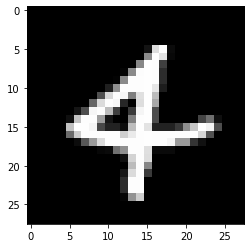

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img,'gray')
plt.show()

# 주요 용어

# 하이퍼파라미터(hyper-parameter)

머신러닝이나 딥러닝에서 훈련을 시킬 때

조금 더 나은 조건에서 할 수 있도록 사용자가 직접 설정해주는 옵션 값

학습속도, 반복횟수, ...등은 사용자가 직접 설정 >>

사용자가 직접 설정하는 값 : 하이퍼파라미터

---

어떤 값을 어떻게 설정하는지에 따라서 그 모델의 성능이나 결과 등이 달라짐

사용자가 따로 건들지 않으면 자동적으로 default값 적용

튜닝 : 하이퍼파라미터 설정하는데에 할애하는 시간 or 행위 자체를 의미

# 에포트(epoch)

반복 횟수 지정

데이터를 학습시키는 과정을 몇 번 반복(iteration)해서 모델이 최적의 가중치를 찾아낼 수 있도록 하는 방법

ex) 1epoch => 한 번 반복

# 과소적합(undefitting) vs 과대적합(overfitting)

모델 학습에 있어서 데이터는 크게

학습용 데이터 / 테스트(예측)용 데이터로 구분

모델 -> 데이터 / 패턴 학습 -> 완성

반복적으로 학습을 시키면 모델은 사람이 발견하기 어려운 패턴을 발견하게 되어서 사람의 예측 성능보다 우월한 모델 생성이 가능


예측용 데이터가 학습시킨 모델과는 다른 데이터의 분포를 가지고 있거나, 학습 시킨 데이터가 한 쪽으로 치우친(편향된) 데이터라면..

-> 모델은 예측 성능이 현저하게 떨어지게 됨

* 과소적합 : 모델이 충분히 학습을 하지 못한 경우 -> 예측 성능 저하
* 과대적합 : 학습 데이터를 지나치게 많이 반복 학습을 시킨 경우

=> 이 두 문제를 최소화 하면서 정확도를 높일 수 있도록 해야함 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [ ]:
# -------------------
# mnist dataset 가져오기
from tensorflow.keras import datasets
mnist = datasets.mnist

In [ ]:
# train용, test용 나누기
(train_data, train_label),(test_data, test_label) = mnist.load_data()

In [ ]:
# train_data의 구조(모양)
train_data.shape

(60000, 28, 28)

In [ ]:
# 현재 : (Batch size(데이터 개수), height, width) -> 차원 늘리기 (Batch size, height, width, channel)
# 차원 수 늘리기 : numpy -> .expand_dims() 함수
# np.expand_dims(배열, 축) : 지정된 축의 차원 확장
new_train_data = np.expand_dims(train_data, -1)
new_train_data.shape


(60000, 28, 28, 1)

In [ ]:
new_train_data = tf.expand_dims(train_data, -1)
new_train_data.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
train_data[..., tf.newaxis].shape # 배열 [..., tf.mewaxis]를 이용하여 차원 확장

(60000, 28, 28, 1)

In [ ]:
n_train_data = train_data.reshape([60000, 28, 28, 1])
n_train_data.shape

(60000, 28, 28, 1)

In [ ]:
np.squeeze(n_train_data[0]).shape # 차원 중 사이즈가 1인 axis를 찾아내서 스칼라 값으로 바꿔 해당 차원을 제거

(28, 28)

In [ ]:
squ = np.squeeze(n_train_data[0])
squ.shape

(28, 28)

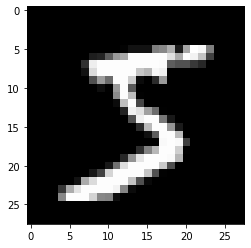

In [ ]:
plt.imshow(squ, 'gray')
plt.show()

In [ ]:
# label 하나 뽑기
train_label.shape

(60000,)

In [ ]:
train_label[9]

4

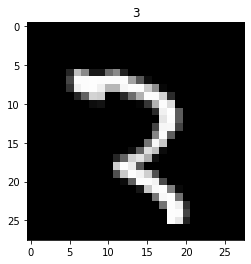

In [ ]:
# matplotlib으로
# 500번째에 있는 학습데이터의 data를 그림으로 출력 + 제목에는 그 그림에 해당하는 숫자
plt.title(train_label[500])
plt.imshow(train_data[500], 'gray')
plt.show()

# to_categorical : one_hot encoding을 해주는 함수 

one-hot encoding : 10진수로 되어있는 정수를 2진수 (Binaray)로 변경해줌

파라미터로 값의 크기만큼 0으로 이루어진 배열을 만들고, 해당하는 값 위치에만 1로 변경됨

In [ ]:
to_categorical(1)

NameError: ignored

In [ ]:
to_categorical(5)

NameError: ignored

In [ ]:
to_categorical(1,5)

In [ ]:
to_categorical(3,10)

In [ ]:
# 훈련용 label에 to_categorical을 적용
label = train_label[10]
label

In [ ]:
ohe_label = to_categorical(label, num_classes=10) # num_classes=10 : 숫자 0~9까지 10개
ohe_label

In [ ]:
plt.title(ohe_label)
plt.imshow(train_data[10],'gray')
plt.show()